<a href="https://colab.research.google.com/github/St-Jester/neural-generated-content-detection/blob/master/analytics/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def write_header(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'w+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

# py-agender 0.0.9

In [0]:
!pip3 install py-agender[cpu]

     |████████████████████████████████| 188.3MB 81kB/s 
     |████████████████████████████████| 13.9MB 328kB/s 
     |████████████████████████████████| 28.2MB 106kB/s 
     |████████████████████████████████| 317kB 39.2MB/s 
     |████████████████████████████████| 110.5MB 47kB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 3.8MB 42.6MB/s 
     |████████████████████████████████| 512kB 42.6MB/s 
     |████████████████████████████████| 921kB 45.3MB/s 
     |████████████████████████████████| 2.7MB 31.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=55e0ae111e4371c736a26dd79e75432139f1338fbcec61c8abe21c32125a78e0
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 1.15.2 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0,

In [0]:


# f = []
# for (dirpath, dirnames, filenames) in walk('/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/Deepfakes/c23/images'):
#     f.extend(filenames)
#     print(f)
#     break

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import cv2
import pandas as pd
import os
from os import walk
from csv import writer
# from pyagender import PyAgender

In [0]:
# def read_file(file_name):
#   # read_data = pd.DataFrame()
#   retun pd.read_csv(file_name)


In [0]:
from pyagender import PyAgender

agender = PyAgender() 
original_path = '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/Deepfakes/c23/images'
csv_path = '/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_DeepFakes.csv'
print(os.path.exists(csv_path))
# prepare csv
# if (os.path.exists(csv_path) != True):
#   write_header(csv_path, ['index','filename', 'gender','age'])

# for (dirpath, dirnames, filenames) in walk(original_path):
#   i = 0
#   read_data = pd.read_csv(csv_path)
#   for filename in filenames:
#     # print(read_data['filename'].tolist())
#     # print(not (original_path+'/'+ filename) in read_data['filename'].tolist())
#     if(not (original_path+'/'+ filename) in read_data['filename'].tolist()):
#       faces = agender.detect_genders_ages(cv2.imread(original_path+'/'+ filename))
#       try:
#         # print(faces[0]['gender'], faces[0]['age'])
#         data_row = pd.DataFrame({'filename':original_path+'/'+ filename, 'gender':faces[0]['gender'],'age':faces[0]['age']}, index=[i])

#       except IndexError:
#         data_row = pd.DataFrame({'filename':original_path+'/'+ filename, 'gender':'-','age':'-'}, index=[i])
#       print(filename)

#       data_row.to_csv(csv_path, mode='a', header=False)
#       i+=1
#     else:
#       print('skipped'+filename)
#   break;

# #RESULT INTERPRETATION
# gender: 0 for female and 1 for male,


False


In [0]:
def record_stats(base_dir, csv_location):
  agender = PyAgender() 
  print(os.path.exists(csv_location))

  if (os.path.exists(csv_location) != True):
    write_header(csv_location, ['index','filename', 'gender','age'])

  for (dirpath, dirnames, filenames) in walk(base_dir):
    i = 0
    real_i = 0
    read_data = pd.read_csv(csv_location)
    for filename in filenames:
      if(not (base_dir+'/'+ filename) in read_data['filename'].tolist()):
        faces = agender.detect_genders_ages(cv2.imread(base_dir+'/'+ filename))
        if(len(faces)>1):
          print(str(real_i)+'2faces');
          real_i+=1
          continue;
        try:
          # print(faces[0]['gender'], faces[0]['age'])
          data_row = pd.DataFrame({'filename':base_dir+'/'+ filename, 'gender':faces[0]['gender'],'age':faces[0]['age']}, index=[i])

        except IndexError:
          data_row = pd.DataFrame({'filename':base_dir+'/'+ filename, 'gender':'-','age':'-'}, index=[i])
        print(str(i)+": " + filename)

        data_row.to_csv(csv_location, mode='a', header=False)
        i+=1
        real_i+=1
      else:
        print('skipped'+filename)

    break;

In [0]:
!ls '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/Deepfakes/c23/images' -l | wc -l

9865


In [0]:
original_path = '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/Deepfakes/c23/images'
csv_path = '/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_DeepFakes.csv'
record_stats(original_path, csv_path)

Streaming output truncated to the last 5000 lines.
48642faces
4156: 913_893.mp4_11.jpg
4157: 339_392.mp4_5.jpg
4158: 508_831.mp4_6.jpg
48682faces
4159: 928_160.mp4_5.jpg
4160: 870_001.mp4_1.jpg
48712faces
4161: 583_558.mp4_1.jpg
4162: 960_999.mp4_6.jpg
4163: 326_501.mp4_16.jpg
4164: 187_234.mp4_13.jpg
48762faces
4165: 871_814.mp4_4.jpg
4166: 912_927.mp4_4.jpg
4167: 794_779.mp4_14.jpg
4168: 299_145.mp4_8.jpg
4169: 155_576.mp4_10.jpg
4170: 002_006.mp4_12.jpg
4171: 718_972.mp4_11.jpg
4172: 450_533.mp4_6.jpg
4173: 146_256.mp4_14.jpg
4174: 827_817.mp4_3.jpg
4175: 038_125.mp4_5.jpg
48882faces
4176: 039_058.mp4_4.jpg
4177: 897_969.mp4_7.jpg
48912faces
4178: 168_222.mp4_14.jpg
4179: 725_724.mp4_6.jpg
4180: 894_848.mp4_3.jpg
48952faces
4181: 224_197.mp4_9.jpg
48972faces
4182: 420_257.mp4_2.jpg
4183: 288_321.mp4_5.jpg
4184: 881_856.mp4_4.jpg
4185: 081_087.mp4_9.jpg
4186: 497_403.mp4_4.jpg
4187: 588_556.mp4_7.jpg
4188: 647_622.mp4_2.jpg
49052faces
4189: 861_858.mp4_9.jpg
4190: 078_955.mp4_2.jpg
4

In [0]:
!ls '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/Face2Face/c23/images' -l | wc -l

In [0]:
original_path = '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/Face2Face/c23/images'
csv_path = '/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_res_F2F_orig.csv'
record_stats(original_path, csv_path)

In [0]:
!ls '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/DeepFakeDetection/c23/images' -l | wc -l

In [0]:
original_path = '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/DeepFakeDetection/c23/images'
csv_path = '/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_res_DeepFakeDet_orig.csv'
record_stats(original_path, csv_path)

In [0]:
!ls '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/FaceSwap/c23/images' -l | wc -l

In [0]:
original_path = '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/FaceSwap/c23/images'
csv_path = '/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_res_FaceSwap_orig.csv'
record_stats(original_path, csv_path)

In [0]:
!ls '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/NeuralTextures/c23/images' -l | wc -l

In [0]:
original_path = '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/NeuralTextures/c23/images'
csv_path = '/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_res_NeuralTextures_orig.csv'
record_stats(original_path, csv_path)

In [0]:
!ls '/content/drive/My Drive/FakeImageDetector/real_images' -l | wc -l

In [0]:
original_path = '/content/drive/My Drive/FakeImageDetector/real_images'
csv_path = '/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_res_RealImages_orig.csv'
record_stats(original_path, csv_path)

# Analysis


In [0]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import os
from os import walk
from csv import writer
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

###  Analysis.Fakes


In [0]:
def show_age_distribution(data, title):
  plt.clf()
  x = data['age']
  plt.figure(num=None, figsize=(24, 12), dpi=80, facecolor='w', edgecolor='k')
  (n, bins, patches) = plt.hist(x, bins = 20, edgecolor='black', density=True)
  plt.xlabel('Age')
  plt.ylabel('Number of observations')
  plt.title(title)
  # x_ticks = np.arange(12, 75, 5)
  # x_position = np.arange(0, len(x), len(x)/100)
  plt.xticks(bins)
  plt.show()

In [0]:
def show_gender_distribution(data, title):
  plt.clf()
  x_2 = data['gender']
  plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
  (n, bins, patches) = plt.hist(x_2, bins = 2, edgecolor='black', density=True)
  plt.xlabel('gender')
  plt.ylabel('Number of observations')
  plt.title(title)
  # x_ticks = np.arange(0, 100, 5)
  print(bins)
  plt.xticks(ticks  = [0, 0.5], labels = ['female', 'male'])

  plt.show()

In [0]:
#read data
missing_values = ["n/a", "na", "-"]
# df = pd.read_csv("property data.csv", na_values = missing_values)

data1 = pd.read_csv('/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_res.csv', na_values = missing_values)
data2 = pd.read_csv('/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_res_F2F_orig.csv', na_values = missing_values)
data3 = pd.read_csv('/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_res_DeepFakeDet_orig.csv',na_values = missing_values)
data4 = pd.read_csv('/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_res_FaceSwap_orig.csv',na_values = missing_values)
data5 = pd.read_csv('/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_res_NeuralTextures_orig.csv',na_values = missing_values)



frames = [data1, data2, data3, data4, data5]

result_fakes = pd.concat(frames)
result_fakes.count()

In [0]:
#drop nan
result_fakes = result_fakes.dropna()
result_fakes.info()

In [0]:
#drop nan separately
data_deepfake = data1.dropna()
methods = ['DeepFake']*data_deepfake['index'].count()
labels = [0]*data_deepfake['index'].count()

data_deepfake.insert(4, "method", methods, True) 
data_deepfake.insert(5, "label", labels, True)
data_deepfake.info()
data_deepfake.head()
#save to csv

In [0]:
show_age_distribution(data_deepfake, "Age distribution in DeepFake dataset")
show_gender_distribution(data_deepfake, "Gender distribution in DeepFake dataset")

In [0]:
data_f2f = data2.dropna()
methods = ['Face2Face']*data_f2f['index'].count()
labels = [0]*data_f2f['index'].count()
data_f2f.insert(4, "method", methods, True) 
data_f2f.insert(5, "label", labels, True) 
data_f2f.info()
data_f2f.head()

In [0]:
show_age_distribution(data_f2f, "Age distribution in Face2Face dataset")
show_gender_distribution(data_f2f, "Gender distribution in Face2Face dataset")

In [0]:
data_deepfakedet = data3.dropna()
methods = ['DeepFakeDetection']*data_deepfakedet['index'].count()
labels = [0]*data_deepfakedet['index'].count()
data_deepfakedet.insert(4, "method", methods, True) 
data_deepfakedet.insert(5, "label", labels, True) 
data_deepfakedet.info()
data_deepfakedet.head()

In [0]:
show_age_distribution(data_deepfakedet, "Age distribution in DeepFakeDetection dataset")
show_gender_distribution(data_deepfakedet, "Gender distribution in DeepFakeDetection dataset")

In [0]:
data_faceswap = data4.dropna()
methods = ['FaceSwap']*data_faceswap['index'].count()
labels = [0]*data_faceswap['index'].count()
data_faceswap.insert(4, "method", methods, True) 
data_faceswap.insert(5, "label", labels, True) 
data_faceswap.info()
data_faceswap.head()

In [0]:
show_age_distribution(data_faceswap, "Age distribution in FaceSwap dataset")
show_gender_distribution(data_faceswap, "Gender distribution in FaceSwap dataset")

In [0]:
data_neuraltexture = data5.dropna()
methods = ['NeuralTexture']*data_neuraltexture['index'].count()
labels = [0]*data_neuraltexture['index'].count()
data_neuraltexture.insert(4, "method", methods, True) 
data_neuraltexture.insert(5, "label", labels, True) 
data_neuraltexture.info()
data_neuraltexture.head()

In [0]:
show_age_distribution(data_neuraltexture, "Age distribution in NeuralTexture dataset")
show_gender_distribution(data_neuraltexture, "Gender distribution in NeuralTexture dataset")

In [0]:
result_fakes['age'].min()

In [0]:
plt.clf()
x = result_fakes['age']
plt.figure(num=None, figsize=(24, 12), dpi=80, facecolor='w', edgecolor='k')
(n, bins, patches) = plt.hist(x, bins = 20, edgecolor='black', density=True)
print(n)
print(bins)
print(patches)
plt.xlabel('Age')
plt.ylabel('Number of observations')
plt.title('Age distribution in ALL FAKES dataset')
# x_ticks = np.arange(12, 75, 5)
# x_position = np.arange(0, len(x), len(x)/100)
plt.xticks(bins)
plt.show()

In [0]:
plt.clf()
x_2 = result_fakes['gender']
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
(n, bins, patches) = plt.hist(x_2, bins = 2, edgecolor='black', density=True)
plt.xlabel('gender')
plt.ylabel('Number of observations')
plt.title('Gender distribution in ALL FAKES dataset')
# x_ticks = np.arange(0, 100, 5)
print(bins)
plt.xticks(ticks  = [0, 0.5], labels = ['female', 'male'])

plt.show()

### Analysis.Reals

In [0]:
#drop nan
# result_fakes = result_fakes.dropna()
#read data
missing_values = ["n/a", "na", "-"]
# df = pd.read_csv("property data.csv", na_values = missing_values)

result_real = pd.read_csv('/content/drive/My Drive/FakeImageDetector/analitycs/pyagender_res_RealImages_orig.csv', na_values = missing_values)
#drop nan
result_real = result_real.dropna()
methods = ['Real']*result_real['index'].count()
labels = [1]*result_real['index'].count()
result_real.insert(4, "method", methods, True) 
result_real.insert(5, "label", labels, True) 
result_real.info()
result_real.head()

In [0]:
result_real['age'].min()

In [0]:
plt.clf()
x = result_real['age']
plt.figure(num=None, figsize=(24, 12), dpi=80, facecolor='w', edgecolor='k')
(n, bins, patches) = plt.hist(x, bins = 20, edgecolor='black', density=True)
print(n)
print(bins)
print(patches)
plt.xlabel('Age')
plt.ylabel('Number of observations')
plt.title('Age distribution in REAL dataset')
# x_ticks = np.arange(12, 75, 5)
# x_position = np.arange(0, len(x), len(x)/100)
plt.xticks(bins)
plt.show()

In [0]:
plt.clf()
x_2 = result_real['gender']
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
(n, bins, patches) = plt.hist(x_2, bins = 2, edgecolor='black', density=True)
plt.xlabel('gender')
plt.ylabel('Number of observations')
plt.title('Gender distribution in REAL dataset')
# x_ticks = np.arange(0, 100, 5)
print(bins)
plt.xticks(ticks  = [0, 0.5], labels = ['female', 'male'])

plt.show()

## dataset generation

In [0]:
# result_real = result_real.drop('index', axis = 1)
# data_neuraltexture = data_neuraltexture.drop('index', axis = 1)
# data_faceswap = data_faceswap.drop('index', axis = 1)
# data_deepfakedet=data_deepfakedet.drop('index', axis = 1)
# data_f2f = data_f2f.drop('index', axis = 1)
# data_deepfake = data_deepfake.drop('index', axis = 1)

In [0]:
data_deepfake.head()

In [0]:
csv_location_dataset = '/content/drive/My Drive/FakeImageDetector/dataset/dataset.csv'

write_header(csv_location_dataset, ['index','filename', 'gender','age', 'method', 'label'])
result_real.to_csv(csv_location_dataset, mode='a', header=False)
data_neuraltexture.to_csv(csv_location_dataset, mode='a', header=False)
data_faceswap.to_csv(csv_location_dataset, mode='a', header=False)
data_deepfakedet.to_csv(csv_location_dataset, mode='a', header=False)
data_f2f.to_csv(csv_location_dataset, mode='a', header=False)
data_deepfake.to_csv(csv_location_dataset, mode='a', header=False)

In [0]:
os.path.exists(csv_location_dataset)

In [0]:
dataset_csv = pd.read_csv(csv_location_dataset, error_bad_lines=False)
dataset_csv.info()
print("\nGender Statistics")
print(dataset_csv['gender'].describe())

print("\nAge Statistics")
print(dataset_csv['age'].describe())

print("\nMethod Statistics")
print(dataset_csv['method'].describe())
print(dataset_csv['method'].value_counts())

print("\nLabel Statistics")
labels_stats = dataset_csv.apply(lambda x: True if x['label'] == 1 else False , axis=1)
 
# Count number of True in series
numOfRows_real = len(labels_stats[labels_stats == True].index)
numOfRows_fakes = len(labels_stats[labels_stats == False].index)
print('Number of Real: ', numOfRows_real)
print('Number of Fakes: ', numOfRows_fakes)

# Add cropped images path

In [0]:
#add cropped
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import os
from os import walk
from csv import writer



In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
def write_dataset(base_folder, csv_location, method, label):
  if (os.path.exists(csv_location) != True):
    write_header(csv_location, ['index','filename', 'method','label'])

  i = 0
  for (dirpath, dirnames, filenames) in walk(base_folder):
    for filename in filenames:

      if(i%1000 == 0):
        print(i)
      data_row = pd.DataFrame.from_records([{'filename': base_folder+'/'+ filename, 'method':method, 'label': label}])
      # data_row = pd.DataFrame({'filename': base_folder+'/'+ filename, 'method':method, 'label': label})
      data_row.to_csv(csv_location, mode='a', header=False)
      i+=1;

    break;

  #get filename
  #find row in dataframe of this dataset

In [0]:
!ls '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/DeepFakeDetection/c23/faces' -l | wc -l


13638


In [0]:
basefoldr = '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/DeepFakeDetection/c23/faces'
csv_location = '/content/drive/My Drive/FakeImageDetector/dataset/faces_DeepFakeDetection.csv'
method = 'FakeImageDetector'
label = 0
write_dataset(basefoldr, csv_location, method, label)


In [0]:
!ls '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/Deepfakes/c23/faces' -l | wc -l

9244


In [0]:
basefoldr = '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/Deepfakes/c23/faces'
csv_location = '/content/drive/My Drive/FakeImageDetector/dataset/faces_Deepfakes_new.csv'
method = 'Deepfakes'
label = 0
write_dataset(basefoldr, csv_location, method, label)


In [0]:
!ls '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/Face2Face/c23/faces' -l | wc -l

9300


In [0]:
basefoldr = '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/Face2Face/c23/faces'
csv_location = '/content/drive/My Drive/FakeImageDetector/dataset/updated/faces_Face2Face_new.csv'
method = 'Face2Face'
label = 0
write_dataset(basefoldr, csv_location, method, label)

In [0]:
!ls '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/FaceSwap/c23/faces' -l | wc -l

7540


In [0]:
basefoldr = '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/FaceSwap/c23/faces'
csv_location = '/content/drive/My Drive/FakeImageDetector/dataset/faces_FaceSwap.csv'
method = 'FaceSwap'
label = 0
write_dataset(basefoldr, csv_location, method, label)

In [0]:
!ls '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/NeuralTextures/c23/faces' -l | wc -l

7532


In [0]:
basefoldr = '/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/NeuralTextures/c23/faces'
csv_location = '/content/drive/My Drive/FakeImageDetector/dataset/faces_NeuralTextures.csv'
method = 'NeuralTextures'
label = 0
write_dataset(basefoldr, csv_location, method, label)

In [0]:
!ls '/content/drive/My Drive/FakeImageDetector/data/original_sequences/faces' -l | wc -l

16041


In [0]:
basefoldr = '/content/drive/My Drive/FakeImageDetector/data/original_sequences/faces'
csv_location = '/content/drive/My Drive/FakeImageDetector/dataset/faces_Real.csv'
method = 'Real'
label = 1
write_dataset(basefoldr, csv_location, method, label)

In [0]:
#read data
missing_values = ["n/a", "na", "-"]
# df = pd.read_csv("property data.csv", na_values = missing_values)

data1 = pd.read_csv('/content/drive/My Drive/FakeImageDetector/dataset/faces_DeepFakeDetection.csv', na_values = missing_values)
data2 = pd.read_csv('/content/drive/My Drive/FakeImageDetector/dataset/faces_Deepfakes_new.csv', na_values = missing_values)
data3 = pd.read_csv('/content/drive/My Drive/FakeImageDetector/dataset/faces_Face2Face.csv',na_values = missing_values)
data4 = pd.read_csv('/content/drive/My Drive/FakeImageDetector/dataset/faces_FaceSwap.csv',na_values = missing_values)
data5 = pd.read_csv('/content/drive/My Drive/FakeImageDetector/dataset/faces_NeuralTextures.csv',na_values = missing_values)
data6 = pd.read_csv('/content/drive/My Drive/FakeImageDetector/dataset/faces_Real.csv',na_values = missing_values)



frames = [data1, data2, data3, data4, data5, data6]

result = pd.concat(frames)
result.count()

#drop nan
result = result.dropna()
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63289 entries, 0 to 16039
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     63289 non-null  int64 
 1   filename  63289 non-null  object
 2   method    63289 non-null  object
 3   label     63289 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ MB


In [0]:
res_csv_path = '/content/drive/My Drive/FakeImageDetector/dataset/dataset_faces_new.csv'
result.to_csv(res_csv_path)


In [0]:
print("\nMethod Statistics")
print(result['method'].describe())
print(result['method'].value_counts())

print("\nLabel Statistics")
labels_stats = result.apply(lambda x: True if x['label'] == 1 else False , axis=1)
 
# Count number of True in series
numOfRows_real = len(labels_stats[labels_stats == True].index)
numOfRows_fakes = len(labels_stats[labels_stats == False].index)
print('Number of Real: ', numOfRows_real)
print('Number of Fakes: ', numOfRows_fakes)


Method Statistics
count     63289
unique        6
top        Real
freq      16040
Name: method, dtype: object
Real                 16040
FakeImageDetector    13637
Face2Face             9299
Deepfakes             9243
FaceSwap              7539
NeuralTextures        7531
Name: method, dtype: int64

Label Statistics
Number of Real:  16040
Number of Fakes:  47249


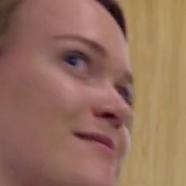

In [0]:
from random import random
from IPython.display import Image
i = 0
for filenam in (result.loc[0]['filename']):

  if(i == int(random()*100)):
    i+=1
    break;
# print(filenam)
# cv2.imread(filenam)
Image(filenam)
